### 결정트리 앙상블 

머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

**RandomForestClassifier**

매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 결과치를 제공하기도 함

배깅(Bootstrap Aggregation) 방식 적용


In [1]:
# 유방암 관련 데이터

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
# 8:2로 훈련 데이터와 검증(test) 데이터로 분리해 주세요

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 훈련, 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

# 객체 생성
'''
100개의 tree로 구성
'''
forest = RandomForestClassifier(n_estimators=30, random_state=0)

# 학습
forest.fit(X_train, y_train)

print('훈련 데이터 정확도 : {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 데이터 정확도 : {:.3f}'.format(forest.score(X_test, y_test)))

훈련 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.947


In [5]:
import matplotlib.pyplot as plt
import numpy as np


# 결정 트리처럼 특성 중요도 제공, 각 트리의 특성 중요도를 취합해서 계산한 결과
# 하나의 트리에서 제공하는 중요도보다 더 신뢰할 만함 

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)


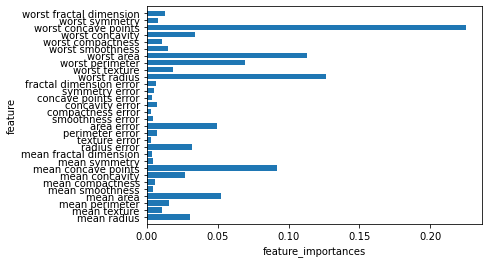

In [6]:
plot_feature_importances_cancer(forest)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 훈련, 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

# 객체 생성
'''

'''
forest = RandomForestClassifier(n_estimators=77, random_state=0)

# 학습
forest.fit(X_train, y_train)

print('훈련 데이터 정확도 : {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 데이터 정확도 : {:.3f}'.format(forest.score(X_test, y_test)))

훈련 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.965


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 훈련, 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

# 객체 생성
'''

'''
forest = RandomForestClassifier(n_estimators=98, random_state=12)

# 학습
forest.fit(X_train, y_train)

print('훈련 데이터 정확도 : {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 데이터 정확도 : {:.3f}'.format(forest.score(X_test, y_test)))

훈련 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.982


In [9]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [10]:
type(X_train)

numpy.ndarray

In [11]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_

<hr>

**GBM(Gradient Boosting Machine)**

유방암 데이터 셋 이용

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import graphviz

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

# max_depth : 3 / n_estimators : 100 / learning_rate : 0.1 값 
gbcl = GradientBoostingClassifier(random_state=0)
gbcl.fit(X_train, y_train)

print('테스트 데이터 정확도 : {:.3f}'.format(gbcl.score(X_test, y_test)))


테스트 데이터 정확도 : 0.965


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

# max_depth : 1 / n_estimators : 100 / learning_rate : 0.1 값 
gbcl = GradientBoostingClassifier(random_state=0, max_depth=1)
gbcl.fit(X_train, y_train)

print('훈련 데이터 정확도 : {:.3f}'.format(gbcl.score(X_train, y_train)))
print('테스트 데이터 정확도 : {:.3f}'.format(gbcl.score(X_test, y_test)))

훈련 데이터 정확도 : 0.991
테스트 데이터 정확도 : 0.974


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

# max_depth : 1 / n_estimators : 100 / learning_rate : 0.1 값 
gbcl = GradientBoostingClassifier(random_state=0, max_depth=11, learning_rate=0.01)
gbcl.fit(X_train, y_train)

print('훈련 데이터 정확도 : {:.3f}'.format(gbcl.score(X_train, y_train)))
print('테스트 데이터 정확도 : {:.3f}'.format(gbcl.score(X_test, y_test)))

훈련 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.912


훈련 데이터 정확도 : 0.985
테스트 데이터 정확도 : 0.965


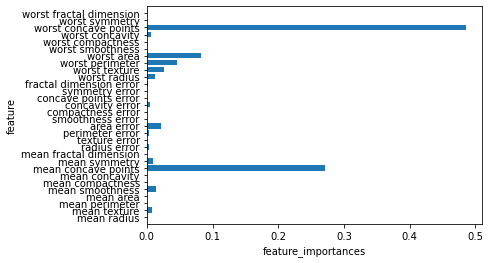

In [15]:
gbcl = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbcl.fit(X_train, y_train)

print('훈련 데이터 정확도 : {:.3f}'.format(gbcl.score(X_train, y_train)))
print('테스트 데이터 정확도 : {:.3f}'.format(gbcl.score(X_test, y_test)))

plot_feature_importances_cancer(gbcl)

In [16]:
결론 : 학습률을 낮추는 것은 test 셋의 성능을 조금 개선
tree의 최대 깊이를 낮추는 경우엔 모델 성능 향상에 기여 

SyntaxError: invalid syntax (<ipython-input-16-e41d42299459>, line 1)

**주요한 속성**

1. min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수
2. min_samples_leaf : 리프노트가 되기 위한 최소한의 샘플 데이터 수
3. max_features : 최적의 분할을 위하 고려해야 할 최대 features 수(default는 모든 feature(None))
4. max_depth : tree의 깊이
    

In [ ]:
GradientBoostingClassifier?